In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re  # re module <- regex

import csv
import os

In [14]:
def get_data() -> str:
    '''data 폴더 내에 모든 파일을 읽어서 str 변수로 반환합니다.'''
    data = ''

    path = os.getcwd() + '/data/'
    file_list = os.listdir(path)
    for i in file_list:
        f = open(path + i, 'r')
        rea = csv.reader(f)
        for row in rea:
            try:
                data += row[0]
            except:
                continue
        f.close
    return data


def get_func_cnt():
    '''func_list내에 내부함수를 get_data()함수의 데이터에서 사용 빈도를 DataFrame으로 반환함(내림차순)'''
    # Built-in function list
    func = ['abs', 'all', 'any', 'bin', 'bool', 'chr', 'dict',
            'dir', 'enumerate', 'eval', 'filter', 'float', 'globals',
            'help', 'hex', 'id', 'input', 'int', 'isinstance', 
            'issubclass', 'iter', 'len', 'list', 'locals', 'map',
            'max', 'min', 'next', 'object', 'oct', 'open', 'ord',
            'pow', 'print', 'property', 'range', 'repr', 'reversed',
            'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod'
            'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']


    # frequency of use of built-in function
    frequency_use = {}


    for i in func:
        frequency_use[i] = len(re.findall(i, get_data()))

    # print(list(cnt.elements()))
    mydf = pd.DataFrame(list(frequency_use.items()), columns=["func-name", "func-cnt"])
    return mydf[mydf['func-cnt'] > 0].sort_values('func-cnt', ascending=False)



<Axes: xlabel='func-name'>

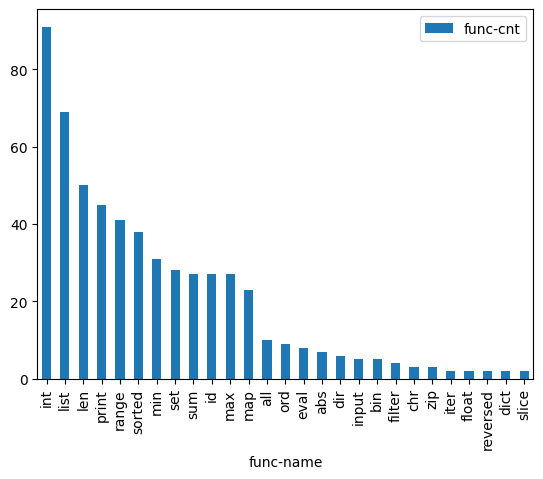

In [21]:
frequency_func = get_func_cnt()
df_zero_remove = frequency_func[frequency_func['func-cnt'].values > 0]
df_zero_remove = df_zero_remove.set_index('func-name')
df_zero_remove.plot(kind='bar')  # , rot=0)

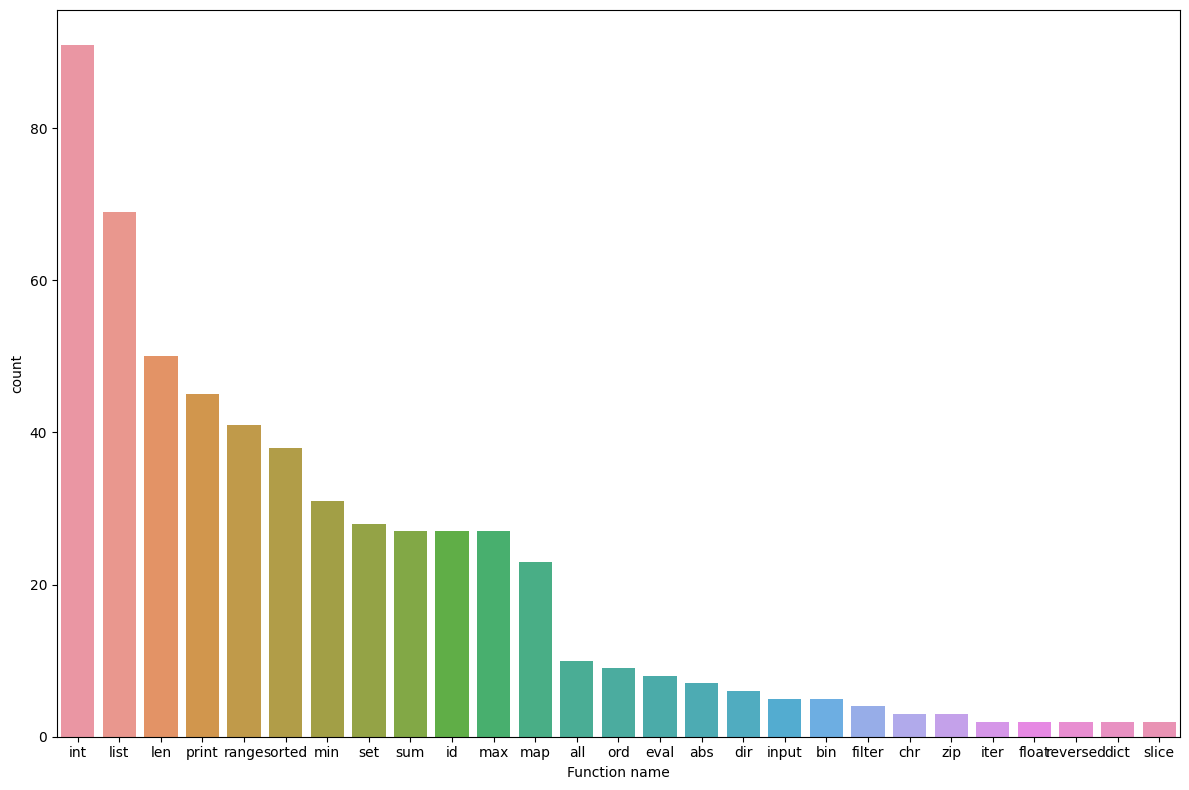

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="func-name", y="func-cnt", data=frequency_func)
ax.set(xlabel="Function name", ylabel="count")
plt.tight_layout()